In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("bench/results.csv", skiprows=10)
df = df[~df['name'].str.contains('mean|median|stddev|cv')]
df['Implementation'] = df['name'].str.extract(r'MatmulBenchmark/(\w+)/')
df['Size'] = df['name'].str.extract(r'/(\d+/\d+/\d+)$')
grouped = df.groupby(['Size', 'Implementation'])['cpu cycles'].mean().reset_index()
pivot_df = grouped.pivot(index='Size', columns='Implementation', values='cpu cycles')
pivot_df = pivot_df.loc[sorted(pivot_df.index, key=lambda x: list(map(int, x.split('/'))))]
pivot_df = pivot_df.loc[sorted(pivot_df.index, key=lambda x: list(map(int, x.split('/'))))]
pivot_df = pivot_df.drop(columns="1x1", errors='ignore')

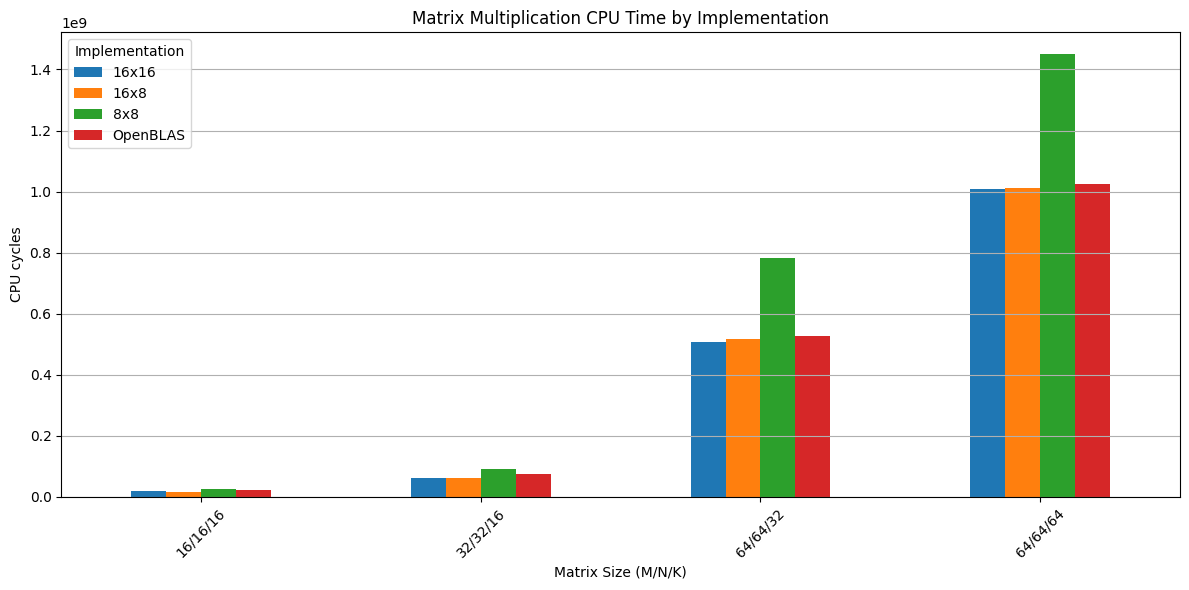

In [3]:
pivot_df.plot(kind='bar', figsize=(12, 6))
plt.title("Matrix Multiplication CPU Time by Implementation")
plt.ylabel("CPU cycles")
plt.xlabel("Matrix Size (M/N/K)")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.legend(title="Implementation")
plt.savefig('images/chart.png')